In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

In [4]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


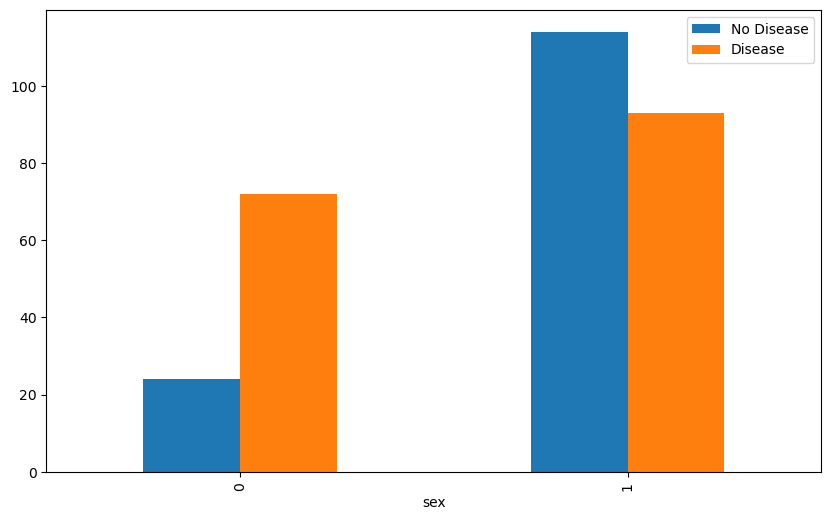

In [12]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(10,6))
plt.legend(['No Disease','Disease'])

In [13]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

Text(0, 0.5, 'thalach')

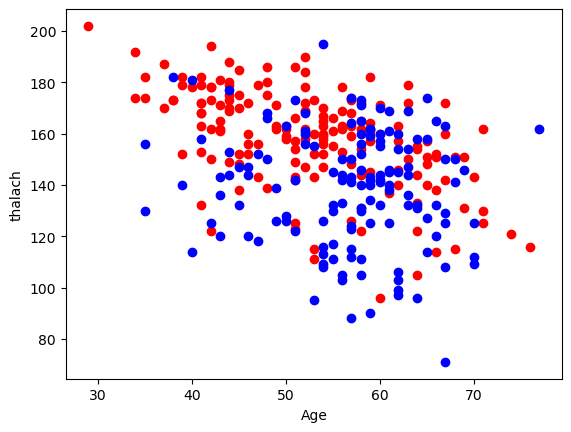

In [14]:
plt.scatter(df.age[df.target==1], df.thalach[df.target==1],c="Red")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],c="Blue")
plt.xlabel("Age")
plt.ylabel("thalach")

## Correlation Matrix

In [15]:
correlation_matrix=df.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


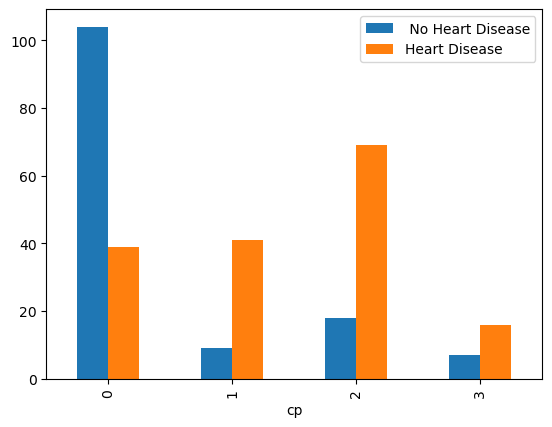

In [16]:
pd.crosstab(df.cp, df.target).plot(kind="bar")
plt.legend([" No Heart Disease","Heart Disease"])


In [17]:
import seaborn as sys

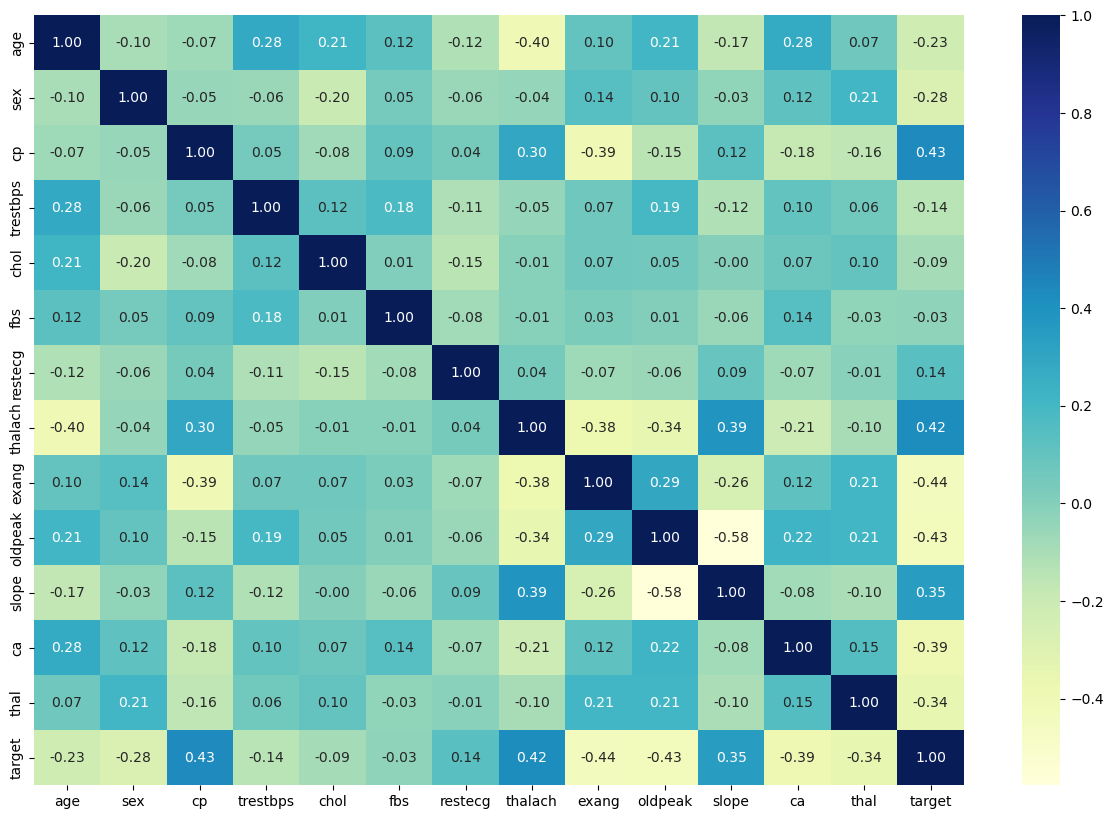

In [18]:
fig, ax =plt.subplots(figsize=(15,10))
ax=sys.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu")

## Scikit Learn Machine learning Map

In [19]:
from sklearn.svm import LinearSVC

In [64]:

x=df.drop("target",axis=True)
y=df["target"]

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

clf_SVC=LinearSVC()
clf_SVC.fit(x_train,y_train)
clf_SVC.score(x_test,y_test)


0.45901639344262296

In [21]:

x=df.drop("target",axis=True)
y=df["target"]

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)


0.819672131147541

## Different Classifiers
* LinearSVC
* RandomForestClassifier
* KNeighborsClassifier
* Logistic Regression 

In [22]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [23]:
Models={"LinearSVC":LinearSVC(),
        "RandomforestClassifier": RandomForestClassifier(),
        "KNC":KNeighborsClassifier(),
        "Logistic Regression":LogisticRegression()
       }
Models

{'LinearSVC': LinearSVC(),
 'RandomforestClassifier': RandomForestClassifier(),
 'KNC': KNeighborsClassifier(),
 'Logistic Regression': LogisticRegression()}

In [24]:
def clf_model_score (Model_Dictionary, x_trainn, x_testt, y_trainn, y_testt):
    """
    It takes several Models in on dictionatry and returns their classification score in another dictionary
    """
    np.random.seed(100)
    model_score={}

    for name, model in Model_Dictionary.items():
        model.fit(x_trainn,y_trainn)
        score=model.score(x_testt, y_testt)
        model_score[name]=score
    return model_score
        
        
    

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)
clf_model_score(Model_Dictionary=Models,x_trainn=x_train, x_testt=x_test,y_trainn=y_train, y_testt=y_test)

{'LinearSVC': 0.7049180327868853,
 'RandomforestClassifier': 0.8360655737704918,
 'KNC': 0.5573770491803278,
 'Logistic Regression': 0.8524590163934426}

## hyperparameter tuning with RandomizedSearchCV

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
param_dist={"n_estimators": list(np.arange(100,1000,200)),
            "max_depth":list(np.random.randint(3,30,3)),
            "min_samples_split": list(np.arange(2,20,10)),
            "min_samples_leaf": list(np.arange(1,20,15)),
            "max_features":["log2"],
            "bootstrap":[False]
            }


In [29]:
list(np.random.randint(3,30,20))

[26, 25, 18, 6, 12, 19, 23, 14, 7, 8, 10, 9, 25, 5, 13, 23, 21, 16, 26, 15]

In [30]:
clf=RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=10,
    scoring="accuracy",
    cv=5,
    verbose=2,
    ## random_state=42,
    n_jobs=-1
    
)
clf

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': [23, 18, 13],
                                        'max_features': ['log2'],
                                        'min_samples_leaf': [1, 16],
                                        'min_samples_split': [2, 12],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900]},
                   scoring='accuracy', verbose=2)

In [31]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': [23, 18, 13],
                                        'max_features': ['log2'],
                                        'min_samples_leaf': [1, 16],
                                        'min_samples_split': [2, 12],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900]},
                   scoring='accuracy', verbose=2)

In [32]:
clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 12,
 'min_samples_leaf': 16,
 'max_features': 'log2',
 'max_depth': 23,
 'bootstrap': False}

In [33]:
clf.score(x_test, y_test)


0.7868852459016393

In [34]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2


In [35]:
new_person=pd.DataFrame([45,0,2,160,227,0,1,154,0,3.5,2,1,3], index=x_test.columns).T

In [36]:
clf.predict(new_person)

array([1], dtype=int64)

## hyperparameter tuning methods
* 1. manual
  2. RandomizedSearchCV
  3. GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
clf_GridSearchCV=GridSearchCV(
                        estimator=RandomForestClassifier(),
                        param_grid=param_dist,
                        cv=5,
                        verbose=2,
                        ## random_state=42,
                        n_jobs=-1
                        )

In [39]:
clf_GridSearchCV.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [23, 18, 13],
                         'max_features': ['log2'], 'min_samples_leaf': [1, 16],
                         'min_samples_split': [2, 12],
                         'n_estimators': [100, 300, 500, 700, 900]},
             verbose=2)

In [40]:
clf_GridSearchCV.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'log2',
 'min_samples_leaf': 16,
 'min_samples_split': 2,
 'n_estimators': 300}

In [41]:
clf_GridSearchCV.best_score_

0.8345238095238094

In [42]:
clf_GridSearchCV.score(x_test,y_test)

0.8360655737704918

## Ecaluating classifier
* ROC curve and AUC Score

In [43]:
from sklearn.metrics import RocCurveDisplay

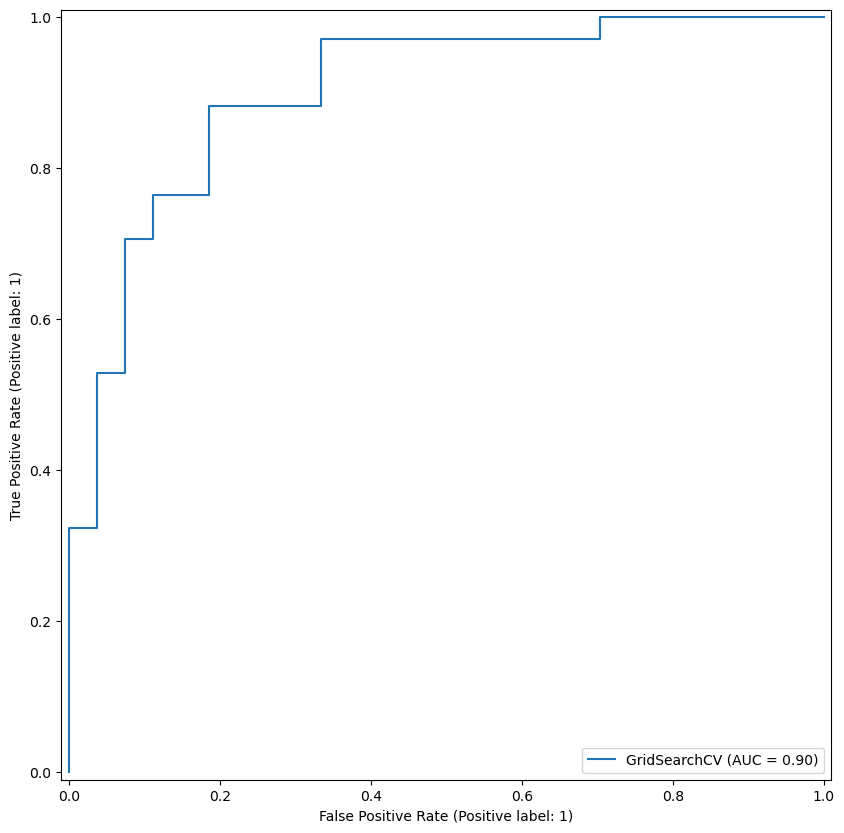

In [44]:
fig, axx= plt.subplots(figsize=(15,10))
RocCurveDisplay.from_estimator(estimator=clf_GridSearchCV,X=x_test,y=y_test, ax=axx)

In [45]:
y_prediction=clf_GridSearchCV.predict(x_test)

In [46]:
confusion_matrix(y_test, y_prediction)

array([[22,  5],
       [ 5, 29]], dtype=int64)

In [47]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
clf_GridSearchCV.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'log2',
 'min_samples_leaf': 16,
 'min_samples_split': 2,
 'n_estimators': 300}

In [50]:
clf=RandomForestClassifier(n_estimators=900,min_samples_split=2,min_samples_leaf=16,max_features='log2',max_depth=23, bootstrap=False)

In [51]:
## cross-validated accuracy
cv_accuracy=cross_val_score(clf,x,y, cv=5, scoring="accuracy")
cv_accuracy=cv_accuracy.mean()
cv_accuracy

0.8283060109289618

In [52]:
## cross-validated precision
cv_precision=cross_val_score(clf,x,y, cv=5, scoring="precision")
cv_precision=cv_precision.mean()
cv_precision

0.8217896405396405

In [53]:
## cross-validated recall
cv_recall=cross_val_score(clf,x,y, cv=5, scoring="recall")
cv_recall=cv_recall.mean()
cv_recall

0.8727272727272727

In [54]:
## cross-validated f1
cv_f1=cross_val_score(clf,x,y, cv=5, scoring="f1")
cv_f1=cv_recall.mean()
cv_f1

0.8727272727272727

## feature_importances

In [59]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [60]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=23, max_features='log2',
                       min_samples_leaf=16, n_estimators=900)

In [61]:
clf.feature_importances_

array([4.79026958e-02, 2.05874239e-02, 2.42281037e-01, 8.49500507e-03,
       1.09402073e-02, 2.05177540e-05, 3.52921822e-03, 1.13543569e-01,
       8.11166778e-02, 8.90765485e-02, 4.18642084e-02, 1.90775414e-01,
       1.49867477e-01])

In [65]:
clf_SVC.coef_

array([[ 0.00213202, -0.20612956,  0.28795211, -0.00518641, -0.00484771,
        -0.01103316,  0.08144087,  0.00691779, -0.15015686, -0.20748347,
         0.05457851, -0.21399146, -0.14760785]])

In [66]:
feature_dict=dict(zip(df.columns, list(clf.feature_importances_)))
feature_dict

{'age': 0.055958003089529876,
 'sex': 0.030507207656152703,
 'cp': 0.2357425573633962,
 'trestbps': 0.010548767397990197,
 'chol': 0.009400328490042003,
 'fbs': 2.093975727579966e-05,
 'restecg': 0.010886010843224932,
 'thalach': 0.07844900879124601,
 'exang': 0.11706676543181757,
 'oldpeak': 0.11665410662250227,
 'slope': 0.04493819016431692,
 'ca': 0.12549434112318852,
 'thal': 0.16433377326931714}

In [68]:
feature_dict_SVC=dict(zip(df.columns, list(clf_SVC.coef_[0])))
feature_dict_SVC

{'age': 0.0021320217404789256,
 'sex': -0.20612956025717263,
 'cp': 0.2879521105340793,
 'trestbps': -0.0051864096402821636,
 'chol': -0.0048477094379699385,
 'fbs': -0.0110331579794866,
 'restecg': 0.08144087277729672,
 'thalach': 0.006917793346721355,
 'exang': -0.15015685603732895,
 'oldpeak': -0.20748347429938666,
 'slope': 0.054578513316129576,
 'ca': -0.21399146325401297,
 'thal': -0.1476078493756088}

<Axes: title={'center': 'coef result'}>

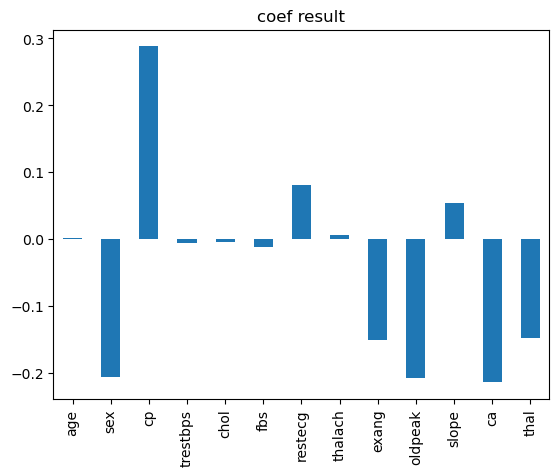

In [73]:
feature_df=pd.DataFrame(feature_dict_SVC, index=[0])
feature_df.T.plot.bar(title="coef result", legend=False)